In [27]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
from scipy.stats import norm
import math
from pycocotools.coco import COCO

In [28]:
# 클래스별 색상 정보
class_colors = {
    0: '#FF0000',
    1: '#0000FF',
    2: '#FFFF00',
    3: '#00FF00',
    4: '#800080',
    5: '#FFC0CB',
    6: '#FFA500',
    7: '#87CEEB',
    8: '#808080',
    9: '#A52A2A'
}

In [29]:
path_train = '/data/ephemeral/home/level2-objectdetection-cv-08/data/recycle/train.json'
path_val = '/data/ephemeral/home/level2-objectdetection-cv-08/data/recycle/val_eye_eda.json'
# Load train.json file
coco_train = COCO(path_train)
coco_val = COCO(path_val)

categories = coco_train.loadCats(coco_train.getCatIds())

loading annotations into memory...


Done (t=0.22s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [30]:
def analyze_class(coco):
    class_counts = {}

    for img_id in coco.imgs:
        ann_ids = coco.getAnnIds(imgIds=[img_id])
        annotations = coco.loadAnns(ann_ids)

        for annotation in annotations:
            class_id = annotation['category_id']
            class_counts[class_id] = class_counts.get(class_id, 0) + 1
    return class_counts
    

In [31]:
def visualize_class_counts(class_counts, class_colors,categories,name):
    sorted_class_ids = sorted(class_counts.keys())
    class_names = [categories[i]['name'] for i in sorted_class_ids]
    counts = [class_counts[i] for i in sorted_class_ids]
    colors = [class_colors[i] for i in sorted_class_ids]

    # 클래스별 카운트 그래프 시각화
    plt.bar(class_names, counts, color=colors)
    plt.ylabel('Count')
    name = 'Class counts '+ name + ' Total: '+str(sum(counts))
    plt.title(name)
    plt.xticks(rotation=45, ha='right')  # 클래스 이름이 길 경우에 회전하여 표시
    plt.tight_layout()
    plt.show()

In [32]:
class_counts_train = analyze_class(coco_train)
class_counts_val = analyze_class(coco_val)

In [33]:
sorted_class_ids = sorted(class_counts_train.keys())
class_names = [categories[i]['name'] for i in sorted_class_ids]
counts_train = [class_counts_train[i] for i in sorted_class_ids]
colors = [class_colors[i] for i in sorted_class_ids]
counts_val = [class_counts_val[i] for i in sorted_class_ids]

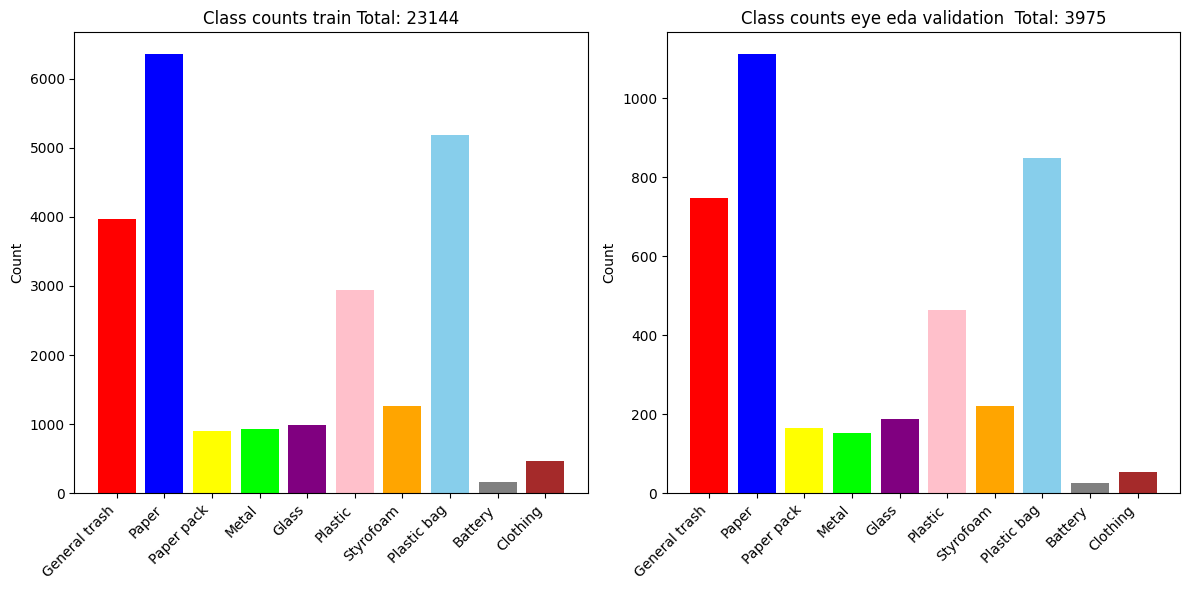

In [34]:
    # 클래스별 카운트 그래프 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(class_names, counts_train, color=colors)
plt.ylabel('Count')
name = 'Class counts '+ 'train' + ' Total: '+str(sum(counts_train))
plt.title(name)
plt.xticks(rotation=45, ha='right')  # 클래스 이름이 길 경우에 회전하여 표시

plt.subplot(1, 2, 2)
plt.bar(class_names, counts_val, color=colors)
plt.ylabel('Count')
name = 'Class counts '+ 'eye eda validation ' + ' Total: '+str(sum(counts_val))
plt.title(name)
plt.xticks(rotation=45, ha='right')  # 클래스 이름이 길 경우에 회전하여 표시
plt.tight_layout()
plt.show()

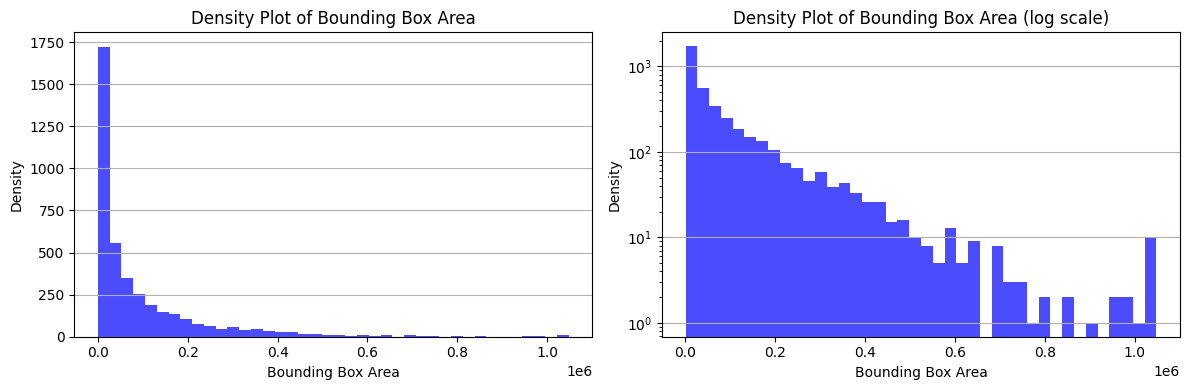

In [35]:
def analyze_class(coco):
    bbox_areas =[]

    for img_id in coco.imgs:
        ann_ids = coco.getAnnIds(imgIds=[img_id])
        annotations = coco.loadAnns(ann_ids)

        for annotation in annotations:
            bbox_areas.append(annotation['area'])
    return bbox_areas

bbox_areas = analyze_class(coco_val)
# 첫 번째 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째 그래프 위치
plt.hist(bbox_areas, bins=40, alpha=0.7, color='blue')
plt.xlabel('Bounding Box Area')
plt.ylabel('Density')
plt.title('Density Plot of Bounding Box Area')
plt.grid(axis='y')


# 두 번째 그래프
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 그래프 위치
plt.hist(bbox_areas, bins=40, alpha=0.7, color='blue')
plt.xlabel('Bounding Box Area')
plt.ylabel('Density')
plt.title('Density Plot of Bounding Box Area (log scale)')
plt.grid(axis='y')
plt.yscale('log')

plt.tight_layout()  # 그래프 간격 조정
plt.show()

In [36]:
class_names = [categories[i]['name'] for i in sorted_class_ids]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

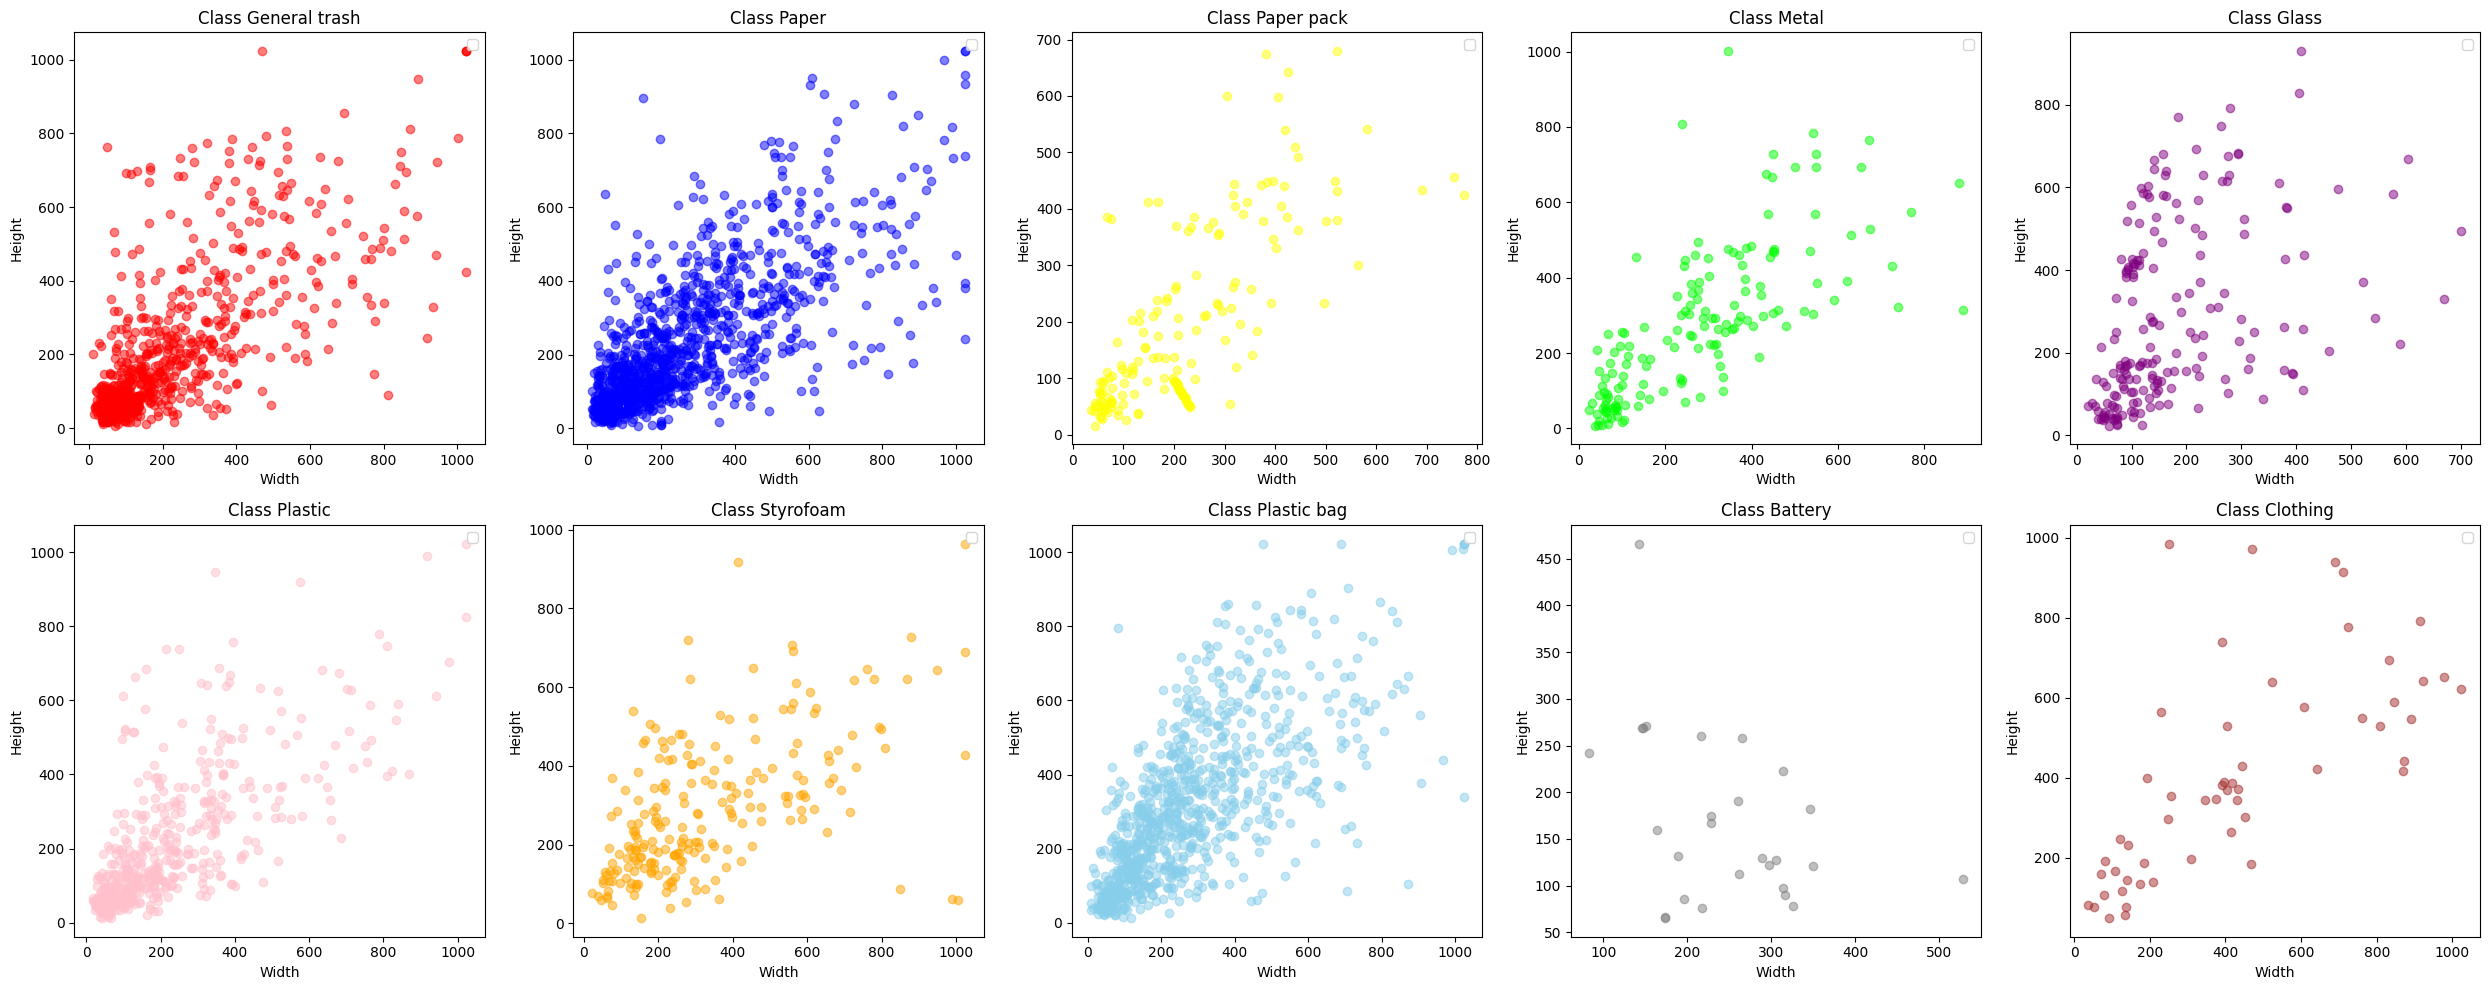

In [37]:
def visualize_bbox_dimensions_by_class(coco_dataset, class_colors,class_name):
    class_dimensions = {class_id: {'widths': [], 'heights': []} for class_id in class_colors}

    for annotation_id in coco_dataset.getAnnIds():
        annotation = coco_dataset.loadAnns(annotation_id)[0]
        class_id = annotation['category_id']

        bbox_width = annotation['bbox'][2]  # Width is the third element in the bbox list
        bbox_height = annotation['bbox'][3]  # Height is the fourth element in the bbox list

        class_dimensions[class_id]['widths'].append(bbox_width)
        class_dimensions[class_id]['heights'].append(bbox_height)

    # Create separate subplots for each class
    fig, axes = plt.subplots(2, 5, figsize=(25, 10))
    axes = axes.flatten()

    for i, (class_id, dimensions) in enumerate(class_dimensions.items()):
        ax = axes[i]
        ax.scatter(dimensions['widths'], dimensions['heights'], color=class_colors[class_id], alpha=0.5)
        ax.set_title(f'Class {class_names[class_id]}')
        ax.set_xlabel('Width')
        ax.set_ylabel('Height')
        ax.legend()

    plt.tight_layout()
    plt.show()

visualize_bbox_dimensions_by_class(coco_val, class_colors,class_names)